# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# print(f"The latitude information received is: {lats}")
# print(f"The longituted information received is: {lngs}")

582

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
units = "imperial"

city_data =[]


for city in cities:
    city_url = url + "&q=" + city.replace(" ","+")
    print(city_url)
    break
    response = requests.get(url + city).json()
    print(response)
    break
    lats.append(response['coord']['lat'])
    lngs.append(response['weather']['temp'])



http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0238de5485a69775c3a392e7664a59cf&q=saskylakh


In [5]:
for i, city in enumerate(cities):
        
    # time.sleep()

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    city_weather = requests.get(city_url).json()

    
    try:
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_description = city_weather["weather"][0]["description"]
      

        city_data.append({"City": city_weather["name"], 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Current Description": city_weather_description,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data_df = pd.DataFrame(city_data, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Current Description', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country'])

# city_data_df = pd.DataFrame(city_data)


In [7]:
print(city_data_df)

              City      Lat       Lng  Max Temp Current Description  Humidity  \
0        Saskylakh  71.9167  114.0833     45.61     overcast clouds        57   
1          Ushuaia -54.8000  -68.3000     40.66          few clouds        75   
2           Molina -35.1167  -71.2833     47.93          few clouds        85   
3          Shimoda  34.6667  138.9500     90.10     overcast clouds        82   
4    French Harbor  16.3500  -86.4333     84.20          few clouds        88   
..             ...      ...       ...       ...                 ...       ...   
528     Kwang Binh  17.4833  106.6000     93.15       broken clouds        56   
529     Piranshahr  36.7010   45.1413     76.37           clear sky        29   
530     Rio Rancho  35.2334 -106.6645     75.15       broken clouds        54   
531  Cockburn Town  21.4612  -71.1419     82.29    scattered clouds        77   
532       Skjervøy  70.0311   20.9714     51.80     overcast clouds        87   

     Cloudiness  Wind Speed

In [8]:
city_data_df.dropna()
city_data_df.count()

City                   533
Lat                    533
Lng                    533
Max Temp               533
Current Description    533
Humidity               533
Cloudiness             533
Wind Speed             533
Country                533
dtype: int64

In [9]:
# Export the city_data into a csv
output_data_file = "../starter_code/vacation.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.head(25)


,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,Saskylakh,71.9167,114.0833,45.61,overcast clouds,57,99,3.00,RU
1,Ushuaia,-54.8000,-68.3000,40.66,few clouds,75,20,2.30,AR
2,Molina,-35.1167,-71.2833,47.93,few clouds,85,20,5.75,CL
3,Shimoda,34.6667,138.9500,90.10,overcast clouds,82,87,3.24,JP
4,French Harbor,16.3500,-86.4333,84.20,few clouds,88,20,16.11,HN
5,Barrow,71.2906,-156.7887,39.22,mist,100,40,5.75,US
6,Albany,42.6001,-73.9662,68.41,broken clouds,95,60,5.48,US
7,Pasni,25.2631,63.4710,83.21,overcast clouds,74,100,11.52,PK
8,Bukachacha,52.9833,116.9167,64.85,overcast clouds,41,100,7.92,RU
9,Sitka,57.0531,-135.3300,62.49,overcast clouds,82,100,5.75,US


In [10]:
# humidity = city_data_df["Humidity"] >100
# humidity.head()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
city_data_df["Humidity"].describe()

count    533.000000
mean      69.168856
std       21.659307
min       12.000000
25%       55.000000
50%       74.000000
75%       85.000000
max      100.000000
Name: Humidity, dtype: float64

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

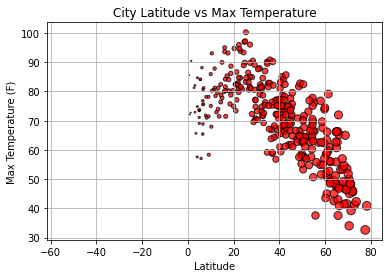

In [18]:
# # The maximum x value for our chart will be 100
# x_limit = 100


x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]


plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75,)


# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatMaxTemp.png")

# Show plot
plt.show()

In [21]:
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.04


# Analysis 
There is a negative correlation between the city latitude and the max temperature

## Latitude vs. Humidity Plot

/Users/xilo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


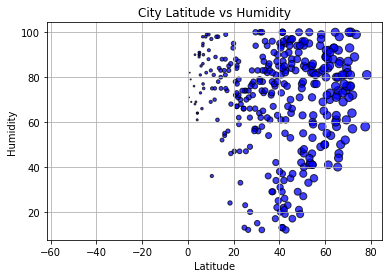

In [23]:
# # The maximum x value for our chart will be 100
# x_limit = 100


y_axis_humidity = city_data_df["Humidity"]

plt.scatter(x_axis, y_axis_humidity, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatHumidity.png")

# Show plot
plt.show()

In [24]:
correlation_humidity = st.pearsonr(x_axis,y_axis_humidity)
print(f"The correlation between both factors is {round(correlation_humidity[0],2)}")

The correlation between both factors is 0.08


# Analysis 
There is a weak correlation beteween the cities altitude and the cities humidity levels

## Latitude vs. Cloudiness Plot

# Analysis

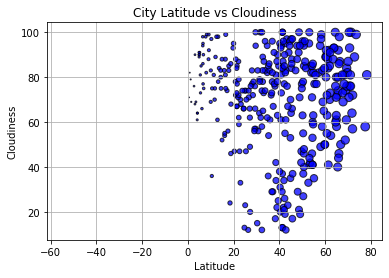

In [25]:
# # The maximum x value for our chart will be 100
# x_limit = 100


y_axis_cloud = city_data_df["Cloudiness"]

plt.scatter(x_axis, y_axis_humidity, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityCloudiness.png")

# Show plot
plt.show()

In [26]:
correlation_cloud = st.pearsonr(x_axis,y_axis_cloud)
print(f"The correlation between both factors is {round(correlation_cloud[0],2)}")

The correlation between both factors is 0.16


# Analysis
There is a semi-weak correlation between the city latitude and the cloudiness of the cities

## Latitude vs. Wind Speed Plot

/Users/xilo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


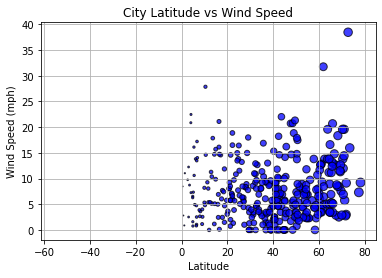

In [28]:

y_axis_wind = city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis_wind, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeed.png")

# Show plot
plt.show()

In [29]:
correlation_wind = st.pearsonr(x_axis,y_axis_wind)
print(f"The correlation between both factors is {round(correlation_wind[0],2)}")

The correlation between both factors is -0.04


# Analysis
There is a moderate negative correaltion between a city latitudes and wind speed

## Linear Regression

In [31]:
## filter your main dataframe where LAT>0 for Northern, LAT<0 for Southern hemispheres

# weather_data_north = city_data_df[city_data_df['Lat'] > 0]
city_data_north = city_data_df[city_data_df['Lat'] > 0]
# weather_data_north.count()

city_data_south = city_data_df[city_data_df['Lat'] < 0]
# weather_data_south.count()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

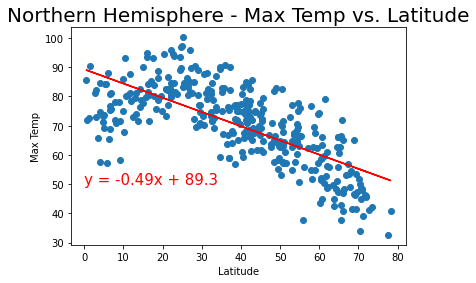

In [32]:
x_value_north = city_data_north['Lat']
y_value = city_data_north['Max Temp']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_north, y_value)
regress_values = x_value_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_north,y_value)
plt.plot(x_value_north,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("latitude_vs_humidity.png")
plt.show


In [33]:
correlation_north = st.pearsonr(x_value_north ,y_value)
print(f"The correlation between both factors is {round(correlation_north[0],2)}")

The correlation between both factors is -0.71


# Analysis
There is a strong negative correlation between the northern hemispheres max temperature and city latitudes

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

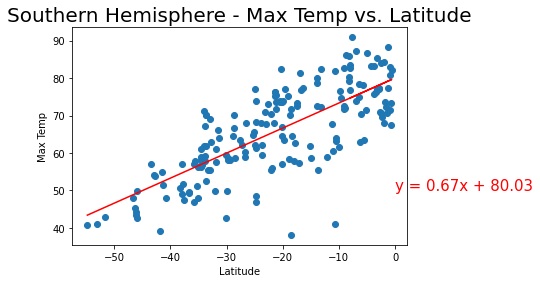

In [35]:
x_value_south = city_data_south['Lat']
y_value_so_hm = city_data_south['Max Temp']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_south, y_value_so_hm)
regress_values = x_value_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_south,y_value_so_hm)
plt.plot(x_value_south,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

# Analysis
There is a strong correlation between the southern hemisphere max temperature and city latitude 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

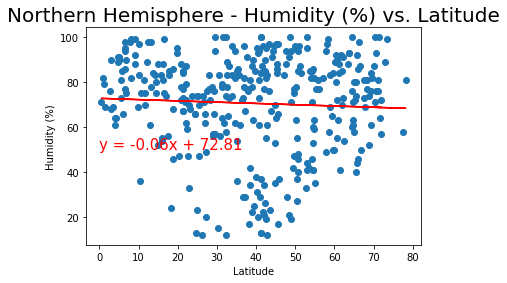

In [36]:
y_value_hum = city_data_north['Humidity']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_north, y_value_hum)
regress_values = x_value_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_north,y_value_hum)
plt.plot(x_value_north,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

In [37]:
correlation_north_hum = st.pearsonr(x_value_north ,y_value_hum)
print(f"The correlation between both factors is {round(correlation_north_hum[0],2)}")

The correlation between both factors is -0.05


# Analysis
There is almost zero correlation between the humidity in cities located in the northern hemisphere and the latitiude of where the cities are located. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

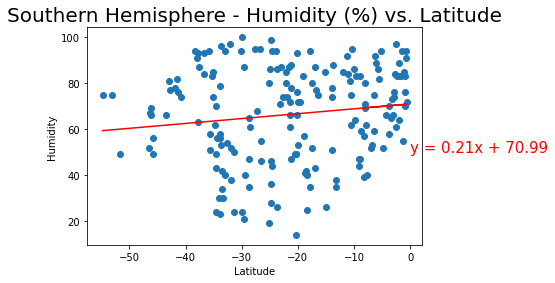

In [38]:
y_value_so_humid = city_data_south['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_south, y_value_so_humid)
regress_values = x_value_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_south,y_value_so_humid)
plt.plot(x_value_south,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

# Analysis 
There is a moderm positive correlation and betwween the latitiude of the cities location and the humidity levels

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

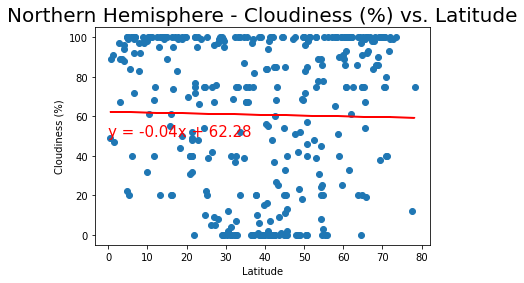

In [39]:
y_value_cloud = city_data_north['Cloudiness']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_north, y_value_cloud)
regress_values = x_value_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_north,y_value_cloud)
plt.plot(x_value_north,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

# Analysis
There is about zero correaltion between the cities latitude and the cloudiness of the city

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

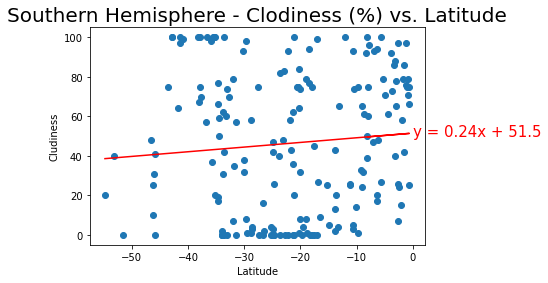

In [40]:
y_value_so_cloud = city_data_south['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_south, y_value_so_cloud)
regress_values = x_value_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_south,y_value_so_cloud)
plt.plot(x_value_south,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere - Clodiness (%) vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Cludiness')
plt.show()

# Analysis 
There is slight correlation between the cities cloduiness and the latitude of the cities in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

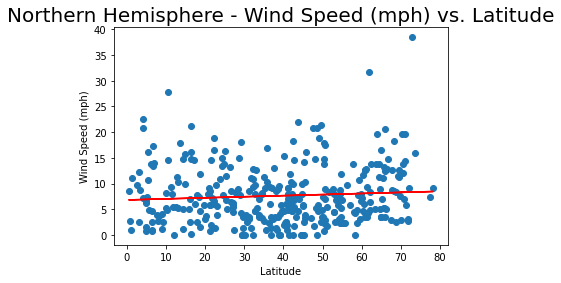

In [41]:
y_value_speed = city_data_north['Wind Speed']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_north, y_value_speed)
regress_values = x_value_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_north,y_value_speed)
plt.plot(x_value_north,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

# Analysis
There is a moderate positive correlation between the wind speeds and the cities latitude

# Analysis

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

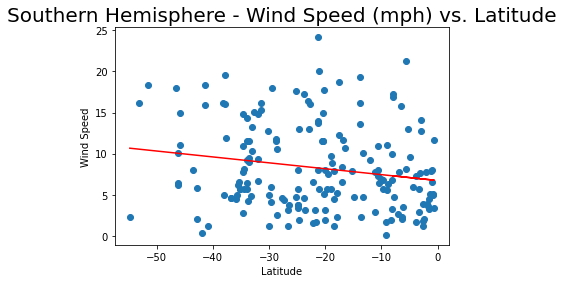

In [42]:
y_value_so_wind = city_data_south['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_south, y_value_so_wind)
regress_values = x_value_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_south,y_value_so_wind)
plt.plot(x_value_south,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude', fontsize=20)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

# Analysis 
There is a negative correaltion between wind speeds and latitidue of cities located in the sothern hemisphere